<a href="https://colab.research.google.com/github/2303A52144/AIML_2303A52144/blob/main/AIML_LAB_EXTERNAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *AIML LAB EXTERNAL*

1. Implement simple linear regression on a dataset and plot the regression line.

Slope (m): -0.00, Intercept (c): 68.27


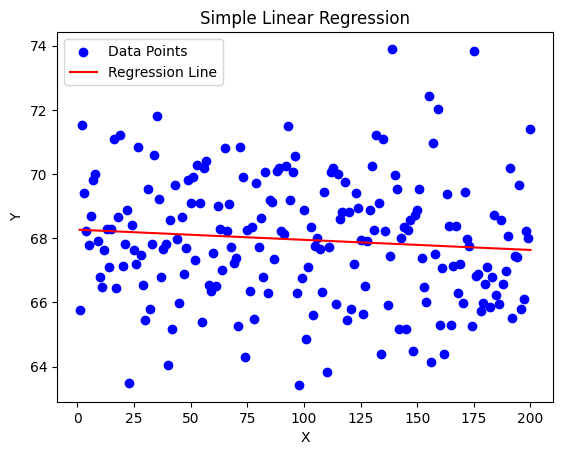

In [2]:
import numpy as np
import matplotlib.pyplot as plt

file_path = "hw_200.csv"
data = np.loadtxt("hw_200.csv", delimiter=",", skiprows=1)

X = data[:, 0]
Y = data[:, 1]

N = len(X)
m = (N * np.sum(X * Y) - np.sum(X) * np.sum(Y)) / (N * np.sum(X**2) - np.sum(X)**2)
c = (np.sum(Y) - m * np.sum(X)) / N

print(f"Slope (m): {m:.2f}, Intercept (c): {c:.2f}")

Y_pred = m * X + c

plt.scatter(X, Y, color='blue', label='Data Points')
plt.plot(X, Y_pred, color='red', label='Regression Line')
plt.title('Simple Linear Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


2.Calculate the R-squared value of the model and interpret it.

Slope (m): -0.00, Intercept (c): 68.27
R-squared: 0.01


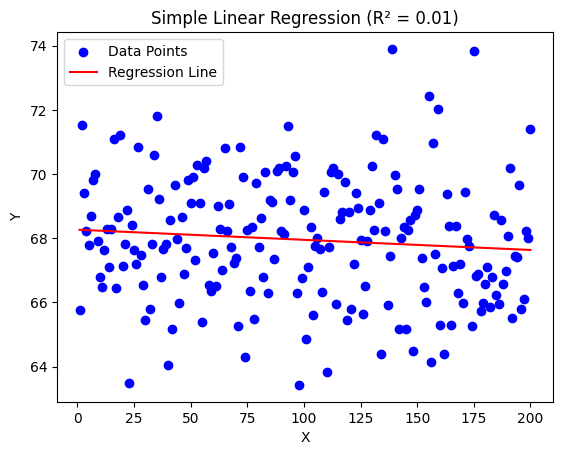

The model explains a low proportion of the variance in the data.


In [3]:
import numpy as np
import matplotlib.pyplot as plt


file_path = "hw_200.csv"
data = np.loadtxt("hw_200.csv", delimiter=",", skiprows=1)

X = data[:, 0]
Y = data[:, 1]


N = len(X)
m = (N * np.sum(X * Y) - np.sum(X) * np.sum(Y)) / (N * np.sum(X**2) - np.sum(X)**2)
c = (np.sum(Y) - m * np.sum(X)) / N

print(f"Slope (m): {m:.2f}, Intercept (c): {c:.2f}")


Y_pred = m * X + c

SS_total = np.sum((Y - np.mean(Y))**2)
SS_residual = np.sum((Y - Y_pred)**2)
R_squared = 1 - (SS_residual / SS_total)

print(f"R-squared: {R_squared:.2f}")


plt.scatter(X, Y, color='blue', label='Data Points')
plt.plot(X, Y_pred, color='red', label='Regression Line')
plt.title(f'Simple Linear Regression (R² = {R_squared:.2f})')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

if R_squared > 0.8:
    print("The model explains a high proportion of the variance in the data.")
elif R_squared > 0.5:
    print("The model explains a moderate proportion of the variance in the data.")
else:
    print("The model explains a low proportion of the variance in the data.")


3. Perform multiple linear regression with 2-3 independent variables and
compare the results.

Intercept (c): -101.38
Coefficients (m): [-0.01592831  3.38789087]
R-squared: 0.32
The model explains a low proportion of the variance in the data.


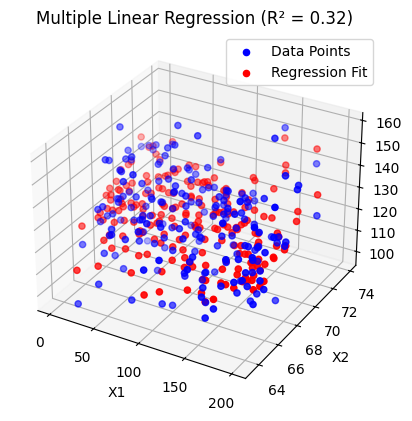

In [4]:
import numpy as np
import matplotlib.pyplot as plt

file_path = "hw_200.csv"
data = np.loadtxt("hw_200.csv", delimiter=",", skiprows=1)


X = data[:, :-1]
Y = data[:, -1]

X = np.hstack((np.ones((X.shape[0], 1)), X))

B = np.linalg.inv(X.T @ X) @ X.T @ Y


c = B[0]
coefficients = B[1:]
print(f"Intercept (c): {c:.2f}")
print(f"Coefficients (m): {coefficients}")

Y_pred = X @ B

SS_total = np.sum((Y - np.mean(Y))**2)
SS_residual = np.sum((Y - Y_pred)**2)
R_squared = 1 - (SS_residual / SS_total)

print(f"R-squared: {R_squared:.2f}")

if R_squared > 0.8:
    print("The model explains a high proportion of the variance in the data.")
elif R_squared > 0.5:
    print("The model explains a moderate proportion of the variance in the data.")
else:
    print("The model explains a low proportion of the variance in the data.")

if X.shape[1] == 3:
    from mpl_toolkits.mplot3d import Axes3D

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X[:, 1], X[:, 2], Y, color='blue', label='Data Points')
    ax.scatter(X[:, 1], X[:, 2], Y_pred, color='red', label='Regression Fit')
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('Y')
    ax.legend()
    plt.title(f'Multiple Linear Regression (R² = {R_squared:.2f})')
    plt.show()


4. Plot the residuals and check for any patterns.

Intercept (c): -101.38
Coefficients (m): [-0.01592831  3.38789087]
R-squared: 0.32


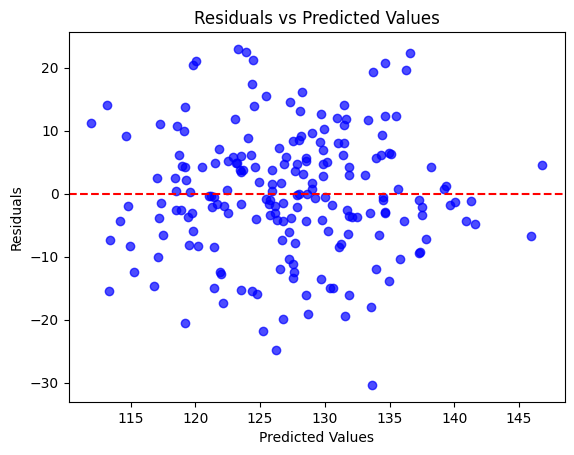

Residuals have a mean close to zero, which is a good sign.


In [5]:
import numpy as np
import matplotlib.pyplot as plt

file_path = "hw_200.csv"
data = np.loadtxt("hw_200.csv", delimiter=",", skiprows=1)

X = data[:, :-1]
Y = data[:, -1]

X = np.hstack((np.ones((X.shape[0], 1)), X))

B = np.linalg.inv(X.T @ X) @ X.T @ Y

c = B[0]
coefficients = B[1:]
print(f"Intercept (c): {c:.2f}")
print(f"Coefficients (m): {coefficients}")

Y_pred = X @ B

SS_total = np.sum((Y - np.mean(Y))**2)
SS_residual = np.sum((Y - Y_pred)**2)
R_squared = 1 - (SS_residual / SS_total)

print(f"R-squared: {R_squared:.2f}")

residuals = Y - Y_pred

plt.scatter(Y_pred, residuals, color='blue', alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

if np.allclose(np.mean(residuals), 0, atol=1e-3):
    print("Residuals have a mean close to zero, which is a good sign.")
else:
    print("Residuals have a non-zero mean, indicating potential issues.")

if np.var(residuals) < 1e-3:
    print("Residuals are tightly clustered, which might indicate overfitting.")


5. Compare the performance of linear regression with and without feature
scaling.

Without Scaling - Intercept: -101.38, Coefficients: [-0.01592831  3.38789087], R-squared: 0.32
With Scaling - Intercept: 127.22, Coefficients: [-0.91961011  6.55728178], R-squared: 0.32


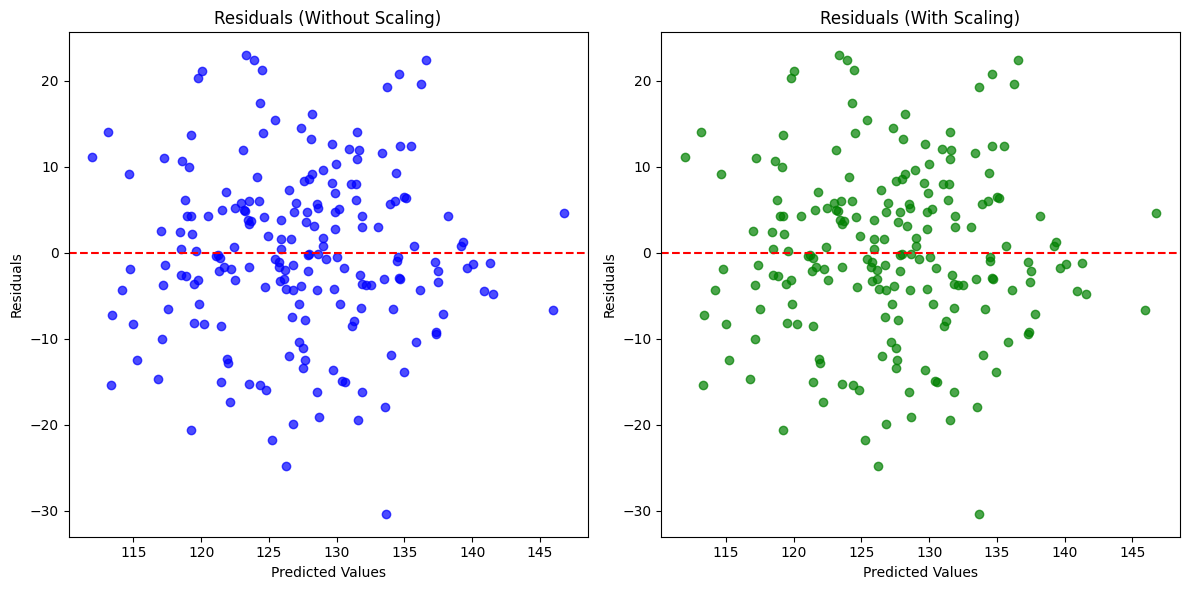

In [7]:
import numpy as np
import matplotlib.pyplot as plt

file_path = "hw_200.csv"
data = np.loadtxt("hw_200.csv", delimiter=",", skiprows=1)

X = data[:, :-1]
Y = data[:, -1]

X_scaled = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

X = np.hstack((np.ones((X.shape[0], 1)), X))
X_scaled = np.hstack((np.ones((X_scaled.shape[0], 1)), X_scaled))

B = np.linalg.inv(X.T @ X) @ X.T @ Y
B_scaled = np.linalg.inv(X_scaled.T @ X_scaled) @ X_scaled.T @ Y

Y_pred = X @ B
Y_pred_scaled = X_scaled @ B_scaled

SS_total = np.sum((Y - np.mean(Y))**2)
SS_residual = np.sum((Y - Y_pred)**2)
SS_residual_scaled = np.sum((Y - Y_pred_scaled)**2)

R_squared = 1 - (SS_residual / SS_total)
R_squared_scaled = 1 - (SS_residual_scaled / SS_total)

print(f"Without Scaling - Intercept: {B[0]:.2f}, Coefficients: {B[1:]}, R-squared: {R_squared:.2f}")
print(f"With Scaling - Intercept: {B_scaled[0]:.2f}, Coefficients: {B_scaled[1:]}, R-squared: {R_squared_scaled:.2f}")

residuals = Y - Y_pred
residuals_scaled = Y - Y_pred_scaled

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(Y_pred, residuals, color='blue', alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals (Without Scaling)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

plt.subplot(1, 2, 2)
plt.scatter(Y_pred_scaled, residuals_scaled, color='green', alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals (With Scaling)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()
